<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/fin/flower/Flower_only_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['rose', 'dandelion', 'daisy', 'tulip', 'sunflower']
X_train_split.shape: (2196, 128, 128, 3)
y_train_split.shape: (2196,)
X_test_split.shape: (550, 128, 128, 3)
y_test_split.shape: (550,)


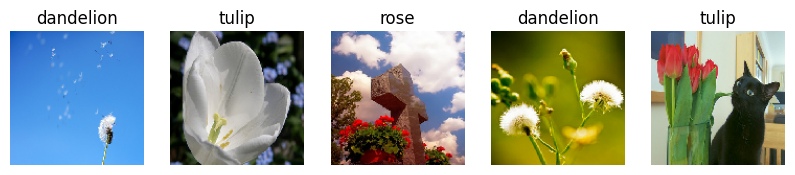

train_labels.shape (one-hot) = (2196, 5)
test_labels.shape (one-hot) = (550, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │      50,332,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,122,693 (195.02 MB)

 Trainable params: 51,122,693 (195.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.1985 - loss: 31.3242
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1867 - loss: 14.6736
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2101 - loss: 8.0413
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.2430 - loss: 3.4279
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3211 - loss: 2.0890
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4019 - loss: 1.4298
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4515 - loss: 1.2997
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4452 - loss: 1.2750
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4555 - loss: 1.2560
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4906 - loss: 1.2072

테스트 정확도: 0.4763636291027069


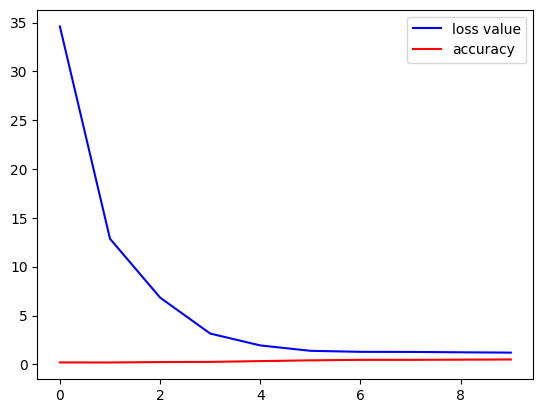

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step


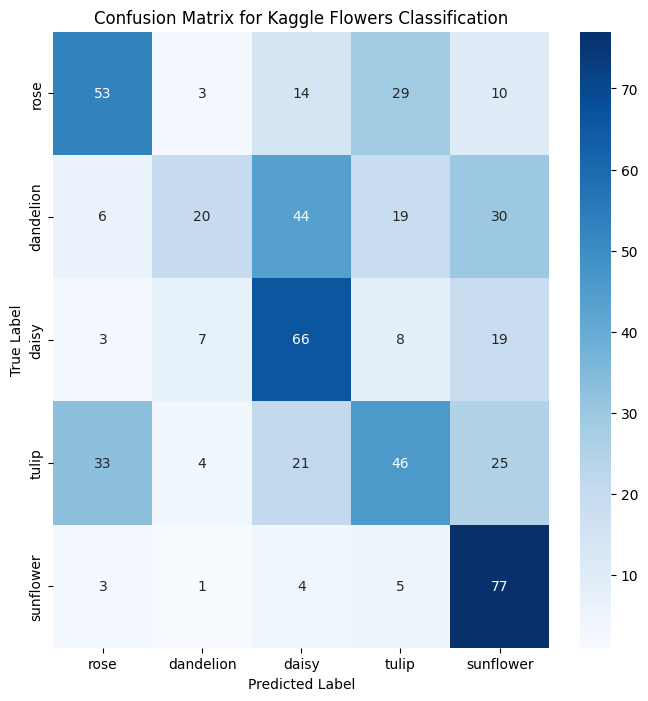

In [7]:
import numpy as np
import os
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

IMAGE_SIZE = (128,128)

def load_train_data(folder_path):
    X = []
    y = []
    class_names = os.listdir(folder_path)
    print(class_names)

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y, class_names


# Load image data
def load_test_data(folder_path):
    X = []
    filenames = []
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            filenames.append(image_name)
    X = np.array(X)
    return X, filenames

# # Load training and testing data
train_folder = './flowers-dataset/train'
test_folder = './flowers-dataset/test'
X_train, y_train, class_names = load_train_data(train_folder)
X_test, test_filenames = load_test_data(test_folder)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize values
# 정규화 수행
X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train_split.shape:", X_train.shape)
print("y_train_split.shape:", y_train.shape)
print("X_test_split.shape:", X_test.shape)
print("y_test_split.shape:", y_test.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])  # 이미지에 해당하는 클래스 이름 표시
    plt.axis('off')
plt.show()


# 레이블을 one-hot encoding으로 변환
train_labels = keras.utils.to_categorical(y_train, 5)
test_labels = keras.utils.to_categorical(y_test, 5)

print('train_labels.shape (one-hot) =', train_labels.shape)
print('test_labels.shape (one-hot) =', test_labels.shape)

# CNN
# train_images = X_train[:, :, :, np.newaxis]
# test_images = X_test[:, :, :, np.newaxis]
# train_images, test_images = train_images / 255, test_images / 255


model = keras.Sequential([
   keras.layers.Flatten(input_shape=(128, 128, 3)), # 32 x 32 x 3 (컬러 이미지)
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(5, activation='softmax')
])

model.summary()   # 모델의 구조를 요약하여 살펴보자

model.compile(optimizer='adam',\
             loss='categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, train_labels, epochs=10, verbose=1, batch_size=256)

test_loss, test_acc = model.evaluate(X_test,  test_labels,\
                                     verbose=0)

print('\n테스트 정확도:', test_acc) # 테스트 정확도: 0.4896000027656555

plt.plot(hist.history['loss'], 'b-', label = "loss value")
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

plt.show()

# # 모델 저장
# model.save('flowers_model.h5')


# 혼동행렬
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 테스트 데이터에 대해 예측 수행
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Kaggle Flowers Classification')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive
%cd MyDrive
%cd 인기초
%ls

/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/인기초
flowers-dataset/
